## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how fast they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [11]:
# 1. Define the first model (simple architecture)
model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 4)),
    ('activation1', nn.ReLU()),
    ('output', nn.Linear(4, 2)),
    ('activation2', nn.Sigmoid())
]))

print("Simple Model architecture:")
print(model1)

Simple Model architecture:
Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (activation1): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (activation2): Sigmoid()
)


In [4]:
# Create input tensor (4 pairs of bits)
data_in = torch.tensor([
    [0, 0],  # 0 + 0
    [0, 1],  # 0 + 1
    [1, 0],  # 1 + 0
    [1, 1]   # 1 + 1
], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [5]:
# your code here
data_target = torch.tensor([
    [0, 0],  # 0 + 0 = 00
    [0, 1],  # 0 + 1 = 01
    [0, 1],  # 1 + 0 = 01
    [1, 0]   # 1 + 1 = 10
], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [6]:
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01) # Adam optimizer with learning rate 0.01

In [7]:
# Train the model
# Training parameters
num_epochs = 1000
print_interval = 100  # How often to print progress

# Training loop
losses = []  # To store loss values for plotting

for epoch in range(num_epochs):
    # Forward pass
    outputs = model1(data_in)
    loss = criterion(outputs, data_target)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights
    
    # Store loss
    losses.append(loss.item())
    
    # Print progress
    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished!")

# Test the model
with torch.no_grad():  # No need to compute gradients for testing
    test_output = model1(data_in)
    # Convert outputs to binary (0 or 1)
    predicted = (test_output >= 0.5).float()
    
    print("\nFinal Results:")
    for i in range(len(data_in)):
        print(f"Input: {data_in[i].tolist()} -> Predicted: {predicted[i].tolist()} (Actual: {data_target[i].tolist()})")


Epoch [100/1000], Loss: 0.0866
Epoch [200/1000], Loss: 0.0181
Epoch [300/1000], Loss: 0.0077
Epoch [400/1000], Loss: 0.0043
Epoch [500/1000], Loss: 0.0027
Epoch [600/1000], Loss: 0.0019
Epoch [700/1000], Loss: 0.0014
Epoch [800/1000], Loss: 0.0011
Epoch [900/1000], Loss: 0.0008
Epoch [1000/1000], Loss: 0.0007
Training finished!

Final Results:
Input: [0.0, 0.0] -> Predicted: [0.0, 0.0] (Actual: [0.0, 0.0])
Input: [0.0, 1.0] -> Predicted: [0.0, 1.0] (Actual: [0.0, 1.0])
Input: [1.0, 0.0] -> Predicted: [0.0, 1.0] (Actual: [0.0, 1.0])
Input: [1.0, 1.0] -> Predicted: [1.0, 0.0] (Actual: [1.0, 0.0])


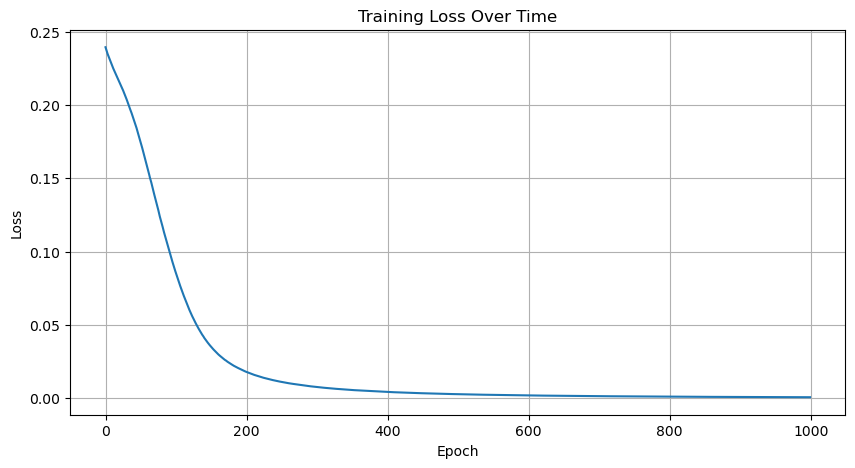

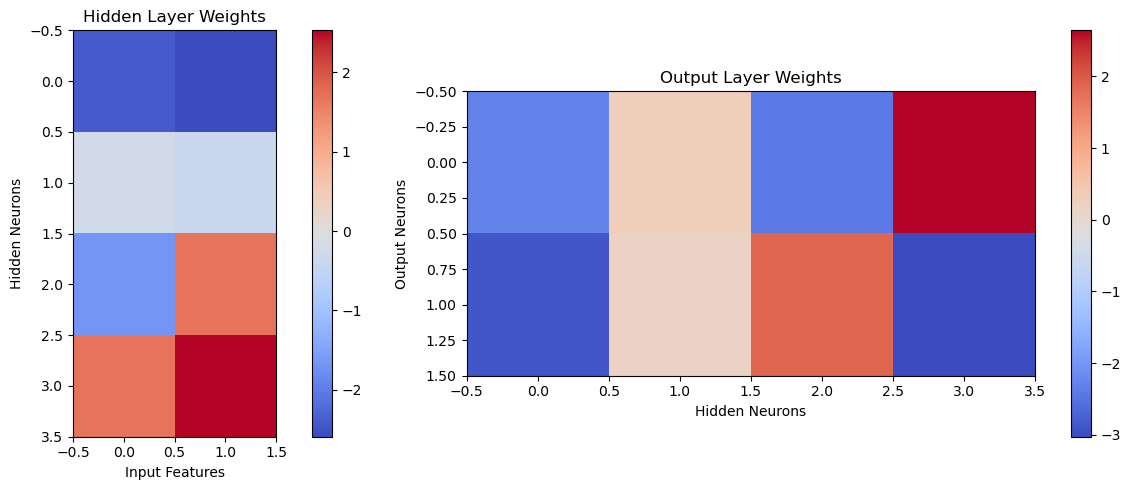

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Visualize Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 2. Visualize Model Weights
def visualize_weights(model):
    # Get weights from each layer
    hidden_weights = model.hidden.weight.data.numpy()
    output_weights = model.output.weight.data.numpy()
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot hidden layer weights
    im1 = ax1.imshow(hidden_weights, cmap='coolwarm')
    ax1.set_title('Hidden Layer Weights')
    ax1.set_xlabel('Input Features')
    ax1.set_ylabel('Hidden Neurons')
    plt.colorbar(im1, ax=ax1)
    
    # Plot output layer weights
    im2 = ax2.imshow(output_weights, cmap='coolwarm')
    ax2.set_title('Output Layer Weights')
    ax2.set_xlabel('Hidden Neurons')
    ax2.set_ylabel('Output Neurons')
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_weights(model1)

In [9]:
# Print actual weight values
# The hidden layer weights represent how stroungly each input connects to each hidden neuron
print("\nHidden Layer Weights:")
print(model1.hidden.weight.data)
# The hidden layer bias represents the threshold for each hidden neuron
print("\nHidden Layer Bias:")
print(model1.hidden.bias.data)
# The output layer weights represent how stroungly each hidden neuron connects to each output neuron
print("\nOutput Layer Weights:")
print(model1.output.weight.data)
# The output layer bias represents the threshold for each output neuron
print("\nOutput Layer Bias:")
print(model1.output.bias.data)


Hidden Layer Weights:
tensor([[-2.4006, -2.5909],
        [-0.2531, -0.3835],
        [-1.6898,  1.6897],
        [ 1.6819,  2.5307]])

Hidden Layer Bias:
tensor([ 2.6381e+00, -6.9444e-01, -1.2055e-04, -1.6823e+00])

Output Layer Weights:
tensor([[-2.2800,  0.2815, -2.4208,  2.6442],
        [-2.8896,  0.1703,  1.8557, -3.0290]])

Output Layer Bias:
tensor([-2.4933,  3.8209])


In [12]:
# define the second model with a medium architecture
model2 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 8)),
    ('activation1', nn.ReLU()),
    ('hidden2', nn.Linear(8, 4)),
    ('activation2', nn.ReLU()),
    ('output', nn.Linear(4, 2)),
    ('activation3', nn.Sigmoid())
]))

print("Medium Model architecture:")
print(model2)

Medium Model architecture:
Sequential(
  (hidden1): Linear(in_features=2, out_features=8, bias=True)
  (activation1): ReLU()
  (hidden2): Linear(in_features=8, out_features=4, bias=True)
  (activation2): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (activation3): Sigmoid()
)


In [13]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)

In [14]:
# Training loop
num_epochs = 1000
print_interval = 100
losses = []

for epoch in range(num_epochs):
    outputs = model2(data_in)
    loss = criterion(outputs, data_target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished!")

# Test the model
with torch.no_grad():
    test_output = model2(data_in)
    predicted = (test_output >= 0.5).float()
    
    print("\nFinal Results:")
    for i in range(len(data_in)):
        print(f"Input: {data_in[i].tolist()} -> Predicted: {predicted[i].tolist()} (Actual: {data_target[i].tolist()})")

Epoch [100/1000], Loss: 0.0076
Epoch [200/1000], Loss: 0.0005
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Training finished!

Final Results:
Input: [0.0, 0.0] -> Predicted: [0.0, 0.0] (Actual: [0.0, 0.0])
Input: [0.0, 1.0] -> Predicted: [0.0, 1.0] (Actual: [0.0, 1.0])
Input: [1.0, 0.0] -> Predicted: [0.0, 1.0] (Actual: [0.0, 1.0])
Input: [1.0, 1.0] -> Predicted: [1.0, 0.0] (Actual: [1.0, 0.0])


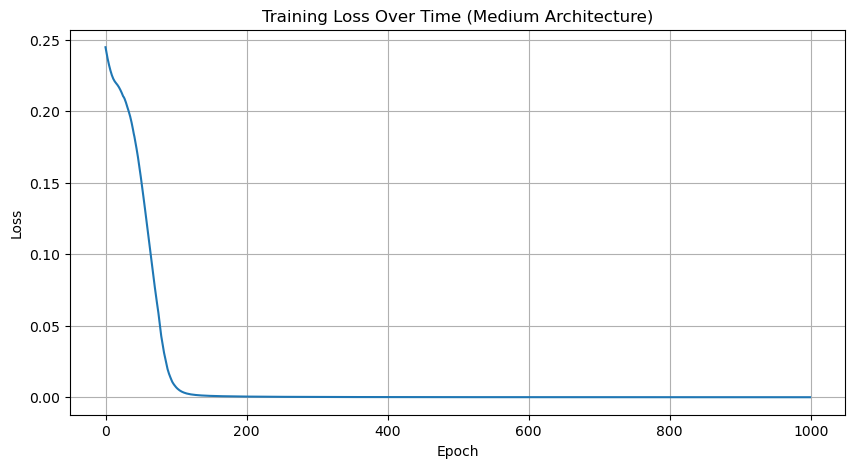

In [15]:
# Visualize training loss
plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses)
plt.title('Training Loss Over Time (Medium Architecture)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

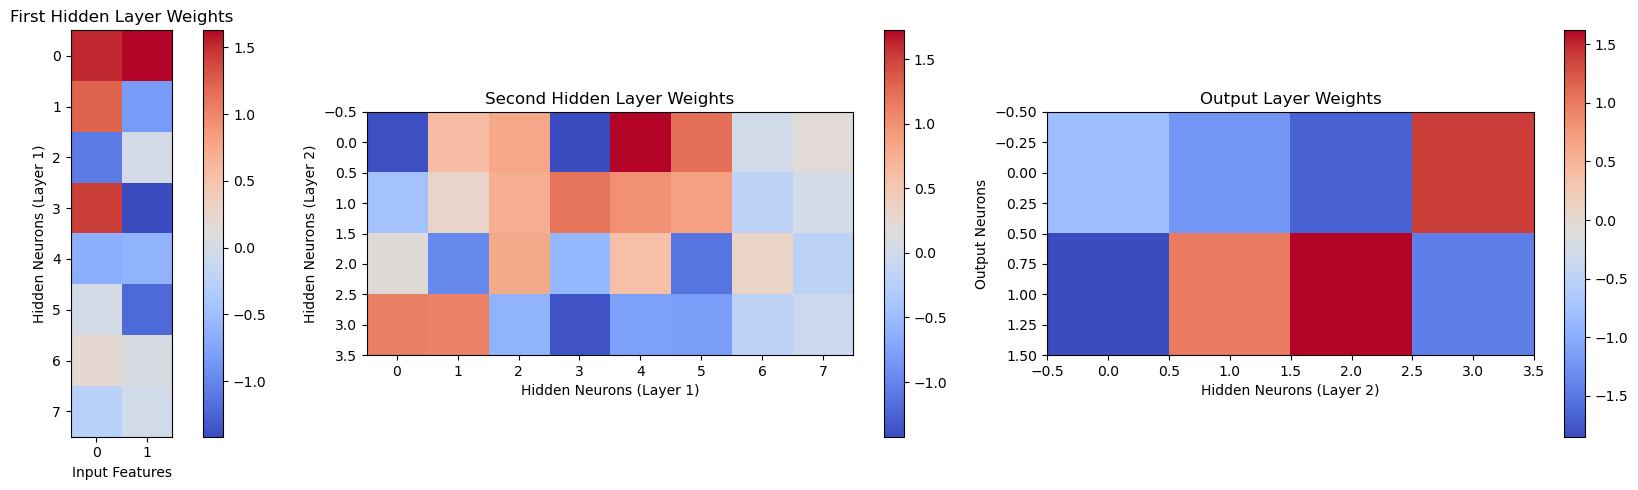

In [16]:
# Visualize weights
def visualize_weights_medium(model):
    # Get weights from each layer
    hidden1_weights = model.hidden1.weight.data.numpy()
    hidden2_weights = model.hidden2.weight.data.numpy()
    output_weights = model.output.weight.data.numpy()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    
    # Plot first hidden layer weights
    im1 = ax1.imshow(hidden1_weights, cmap='coolwarm')
    ax1.set_title('First Hidden Layer Weights')
    ax1.set_xlabel('Input Features')
    ax1.set_ylabel('Hidden Neurons (Layer 1)')
    plt.colorbar(im1, ax=ax1)
    
    # Plot second hidden layer weights
    im2 = ax2.imshow(hidden2_weights, cmap='coolwarm')
    ax2.set_title('Second Hidden Layer Weights')
    ax2.set_xlabel('Hidden Neurons (Layer 1)')
    ax2.set_ylabel('Hidden Neurons (Layer 2)')
    plt.colorbar(im2, ax=ax2)
    
    # Plot output layer weights
    im3 = ax3.imshow(output_weights, cmap='coolwarm')
    ax3.set_title('Output Layer Weights')
    ax3.set_xlabel('Hidden Neurons (Layer 2)')
    ax3.set_ylabel('Output Neurons')
    plt.colorbar(im3, ax=ax3)
    
    plt.tight_layout()
    plt.show()

visualize_weights_medium(model2)

In [17]:
# Print weights
print("\nFirst Hidden Layer Weights:")
print(model2.hidden1.weight.data)
print("\nFirst Hidden Layer Bias:")
print(model2.hidden1.bias.data)
print("\nSecond Hidden Layer Weights:")
print(model2.hidden2.weight.data)
print("\nSecond Hidden Layer Bias:")
print(model2.hidden2.bias.data)
print("\nOutput Layer Weights:")
print(model2.output.weight.data)
print("\nOutput Layer Bias:")
print(model2.output.bias.data)


First Hidden Layer Weights:
tensor([[ 1.5226e+00,  1.6285e+00],
        [ 1.2184e+00, -8.2553e-01],
        [-1.0794e+00, -1.2183e-02],
        [ 1.4162e+00, -1.4162e+00],
        [-6.6644e-01, -6.1673e-01],
        [-2.4470e-05, -1.2122e+00],
        [ 2.0034e-01,  4.4907e-02],
        [-2.5672e-01, -2.8040e-02]])

First Hidden Layer Bias:
tensor([ 9.3895e-07,  8.2567e-01,  1.3259e+00, -6.7906e-07,  1.2832e+00,
         1.2122e+00, -4.8903e-01, -5.1745e-01])

Second Hidden Layer Weights:
tensor([[-1.3884,  0.6161,  0.8163, -1.4240,  1.7254,  1.2258,  0.0247,  0.2031],
        [-0.4247,  0.3205,  0.7732,  1.2008,  1.0092,  0.8881, -0.1807,  0.0496],
        [ 0.1987, -0.9645,  0.7935, -0.5559,  0.5818, -1.1268,  0.3248, -0.2054],
        [ 1.1273,  1.1103, -0.5991, -1.3637, -0.7629, -0.8062, -0.1929, -0.0351]])

Second Hidden Layer Bias:
tensor([ 0.1199,  0.7929,  0.3636, -0.4592])

Output Layer Weights:
tensor([[-0.8034, -1.2384, -1.6706,  1.4007],
        [-1.8488,  0.9853,  1.6185,

In [18]:
# define the third model with a complex architecture
model3 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 16)),
    ('activation1', nn.ReLU()),
    ('hidden2', nn.Linear(16, 8)),
    ('activation2', nn.ReLU()),
    ('hidden3', nn.Linear(8, 4)),
    ('activation3', nn.ReLU()),
    ('output', nn.Linear(4, 2)),
    ('activation4', nn.Sigmoid())
]))

print("Complex Model architecture:")
print(model3)

Complex Model architecture:
Sequential(
  (hidden1): Linear(in_features=2, out_features=16, bias=True)
  (activation1): ReLU()
  (hidden2): Linear(in_features=16, out_features=8, bias=True)
  (activation2): ReLU()
  (hidden3): Linear(in_features=8, out_features=4, bias=True)
  (activation3): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (activation4): Sigmoid()
)


In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)

In [20]:
# Training loop
num_epochs = 1000
print_interval = 100
losses = []

for epoch in range(num_epochs):
    outputs = model3(data_in)
    loss = criterion(outputs, data_target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished!")

# Test results
with torch.no_grad():
    test_output = model3(data_in)
    predicted = (test_output >= 0.5).float()
    
    print("\nFinal Results:")
    for i in range(len(data_in)):
        print(f"Input: {data_in[i].tolist()} -> Predicted: {predicted[i].tolist()} (Actual: {data_target[i].tolist()})")

Epoch [100/1000], Loss: 0.0005
Epoch [200/1000], Loss: 0.0001
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Training finished!

Final Results:
Input: [0.0, 0.0] -> Predicted: [0.0, 0.0] (Actual: [0.0, 0.0])
Input: [0.0, 1.0] -> Predicted: [0.0, 1.0] (Actual: [0.0, 1.0])
Input: [1.0, 0.0] -> Predicted: [0.0, 1.0] (Actual: [0.0, 1.0])
Input: [1.0, 1.0] -> Predicted: [1.0, 0.0] (Actual: [1.0, 0.0])


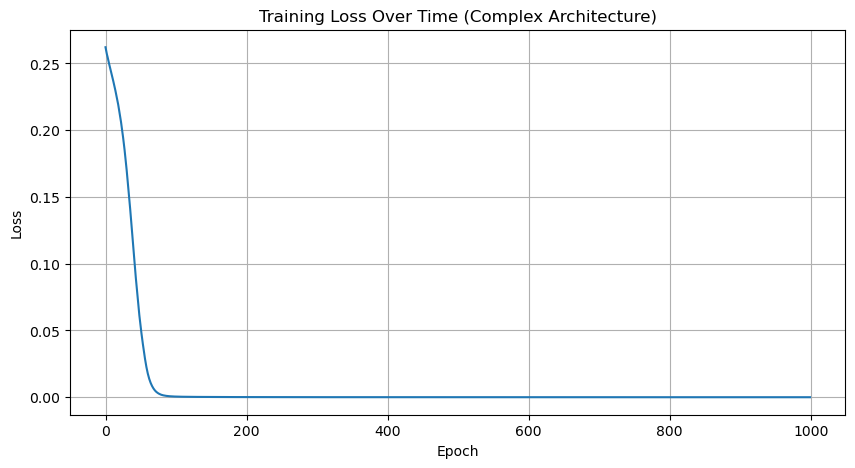

In [21]:
# Visualize training loss
plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses)
plt.title('Training Loss Over Time (Complex Architecture)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

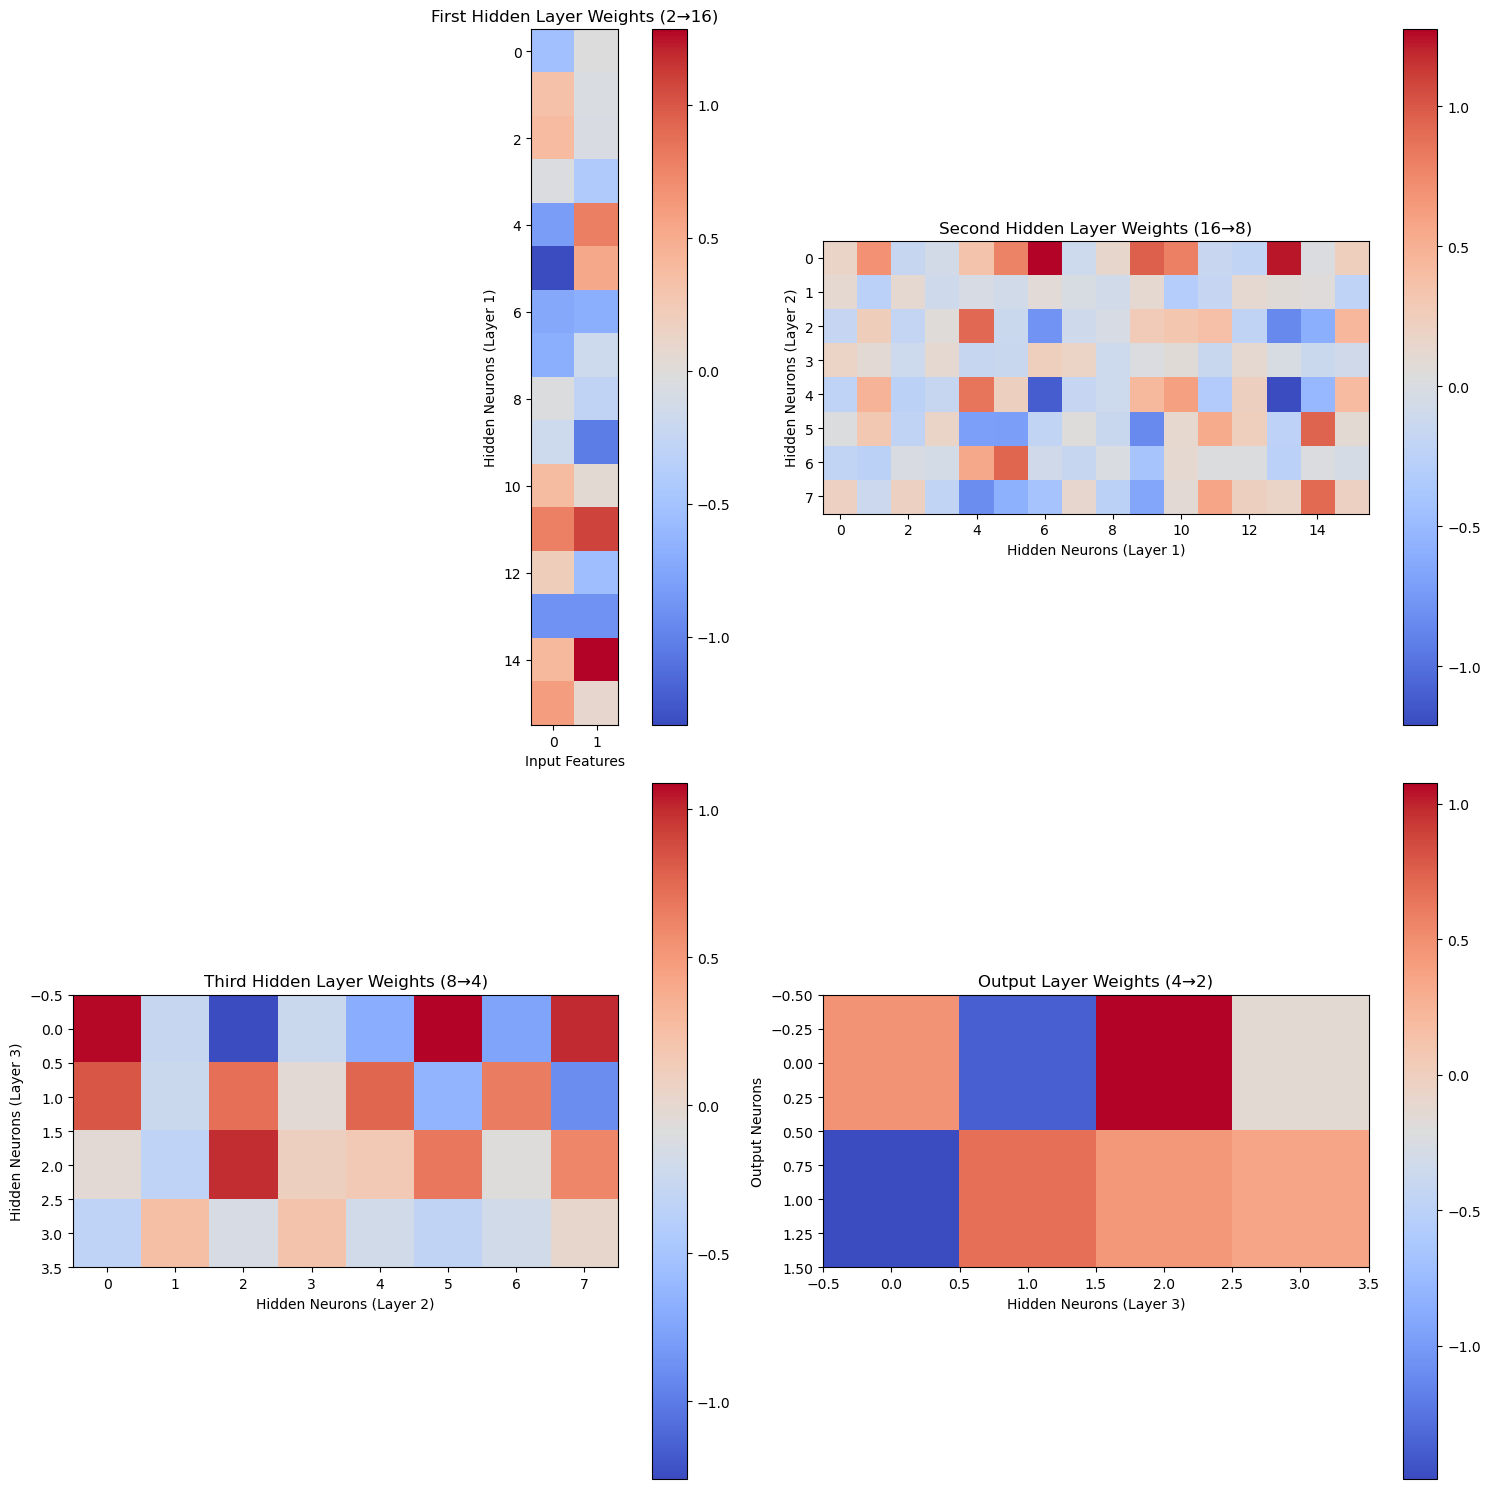

In [22]:
# Visualize weights
def visualize_weights_complex(model):
    # Get weights from each layer
    hidden1_weights = model.hidden1.weight.data.numpy()
    hidden2_weights = model.hidden2.weight.data.numpy()
    hidden3_weights = model.hidden3.weight.data.numpy()
    output_weights = model.output.weight.data.numpy()
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    
    # Plot first hidden layer weights
    im1 = ax1.imshow(hidden1_weights, cmap='coolwarm')
    ax1.set_title('First Hidden Layer Weights (2→16)')
    ax1.set_xlabel('Input Features')
    ax1.set_ylabel('Hidden Neurons (Layer 1)')
    plt.colorbar(im1, ax=ax1)
    
    # Plot second hidden layer weights
    im2 = ax2.imshow(hidden2_weights, cmap='coolwarm')
    ax2.set_title('Second Hidden Layer Weights (16→8)')
    ax2.set_xlabel('Hidden Neurons (Layer 1)')
    ax2.set_ylabel('Hidden Neurons (Layer 2)')
    plt.colorbar(im2, ax=ax2)
    
    # Plot third hidden layer weights
    im3 = ax3.imshow(hidden3_weights, cmap='coolwarm')
    ax3.set_title('Third Hidden Layer Weights (8→4)')
    ax3.set_xlabel('Hidden Neurons (Layer 2)')
    ax3.set_ylabel('Hidden Neurons (Layer 3)')
    plt.colorbar(im3, ax=ax3)
    
    # Plot output layer weights
    im4 = ax4.imshow(output_weights, cmap='coolwarm')
    ax4.set_title('Output Layer Weights (4→2)')
    ax4.set_xlabel('Hidden Neurons (Layer 3)')
    ax4.set_ylabel('Output Neurons')
    plt.colorbar(im4, ax=ax4)
    
    plt.tight_layout()
    plt.show()

visualize_weights_complex(model3)

In [23]:
# Print weights
print("\nFirst Hidden Layer Weights (2→16):")
print(model3.hidden1.weight.data)
print("\nSecond Hidden Layer Weights (16→8):")
print(model3.hidden2.weight.data)
print("\nThird Hidden Layer Weights (8→4):")
print(model3.hidden3.weight.data)
print("\nOutput Layer Weights (4→2):")
print(model3.output.weight.data)


First Hidden Layer Weights (2→16):
tensor([[-0.5246, -0.0291],
        [ 0.3271, -0.0627],
        [ 0.3783, -0.0734],
        [-0.0454, -0.4125],
        [-0.8125,  0.7928],
        [-1.3329,  0.5179],
        [-0.7338, -0.6809],
        [-0.6812, -0.1685],
        [-0.0372, -0.2805],
        [-0.1674, -1.0293],
        [ 0.3672,  0.0373],
        [ 0.7792,  1.0812],
        [ 0.2043, -0.5401],
        [-0.8865, -0.8865],
        [ 0.3952,  1.2845],
        [ 0.5910,  0.0794]])

Second Hidden Layer Weights (16→8):
tensor([[ 1.7309e-01,  6.9940e-01, -1.6757e-01, -6.0751e-02,  3.5256e-01,
          7.8378e-01,  1.2751e+00, -1.0585e-01,  1.4523e-01,  9.6300e-01,
          7.9121e-01, -1.4635e-01, -1.9089e-01,  1.2350e+00,  8.8084e-03,
          2.3543e-01],
        [ 1.0402e-01, -2.5243e-01,  1.0394e-01, -9.4645e-02, -3.3306e-02,
         -6.6272e-02,  7.7106e-02, -2.4973e-02, -8.2713e-02,  1.0404e-01,
         -3.0693e-01, -1.7856e-01,  1.1393e-01,  6.8830e-02,  5.0385e-02,
         -2